<a href="https://colab.research.google.com/github/gbAguiiar/machine-learning-unsupervised/blob/main/Trab2_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/mall_customers.csv")

In [4]:
df.head()
#visualizando informações que o dataset possui

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,64,116,33
1,2,Female,29,101,30
2,3,Male,33,36,81
3,4,Male,41,62,32
4,5,Male,36,135,42


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,43.715500,77.44650,50.658500
std,577.494589,15.067816,35.89729,28.383687
min,1.000000,18.000000,15.00000,1.000000
25%,500.750000,31.000000,47.00000,26.000000
50%,1000.500000,43.000000,76.50000,51.000000
75%,1500.250000,56.250000,108.00000,76.000000
max,2000.000000,70.000000,140.00000,100.000000


In [6]:
df.info()
#verificado que todas as colunas são númericas, exceto a de gênero, será necessário aplicar o One-Hot enconding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income (k$)      2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 78.3+ KB


In [7]:
#dropa tabela de ID que não será relevante para o dataset
df = df.drop("CustomerID", axis=1)

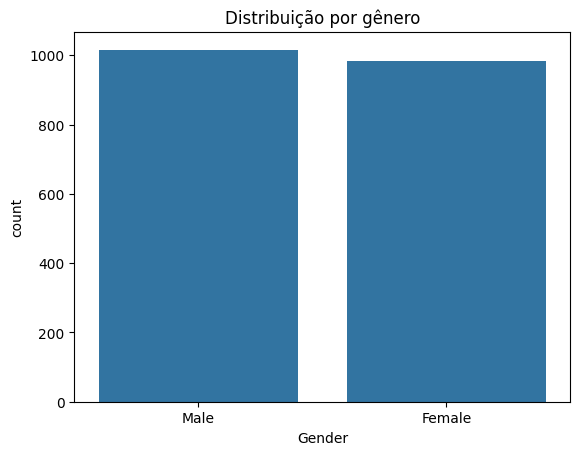

In [8]:
sns.countplot(data=df, x='Gender')
plt.title("Distribuição por gênero")
plt.show()

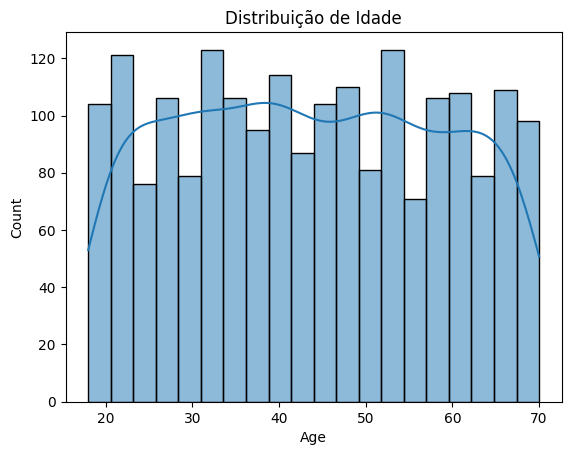

In [9]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Distribuição de Idade")
plt.show()


Essas diferenças de distribuição de idade já indicam que pode haver clusters naturais entre:

Jovens adultos (18–30),

Adultos médios (30–45),

Adultos mais velhos (45+).

In [10]:
#aplica one-hot encoding na coluna Gender
df = pd.get_dummies(df, columns=["Gender"], drop_first=True)

In [11]:
#Escala as colunas diretamente do dataset

scaler = StandardScaler()
numeric_features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1.346550,1.074263,-0.622291,True
1,-0.976862,0.656300,-0.728012,False
2,-0.711329,-1.154875,1.069244,True
3,-0.180264,-0.430405,-0.657531,True
4,-0.512180,1.603684,-0.305128,True


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Text(0, 0.5, 'Inércia (WCSS)')

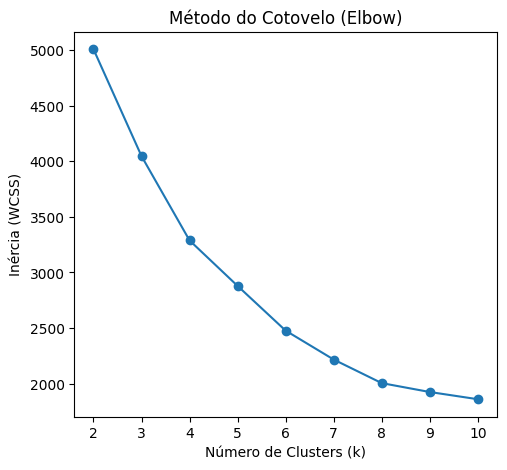

In [13]:
#aplica o gráfico do cotovelo para identificar o melhor número de K=4

X = df.copy()

inertias = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))

# Gráfico do Método do Cotovelo
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertias, marker='o')
plt.title("Método do Cotovelo (Elbow)")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia (WCSS)")


Através do gráfico acima usando o método do cotovelo
é perceptível que o melhor número de cluster para este dataset é K=4

In [14]:
from sklearn.cluster import KMeans

X = df[numeric_features]  # usa as colunas já escaladas
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters



In [15]:
#Faz um for em todas as combinações para verificar o melhor silhouette score
combinacoes = [
    ["Age", "Spending Score (1-100)"],
    ["Annual Income (k$)", "Spending Score (1-100)"],
    ["Age", "Annual Income (k$)"],
    ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
]

for combo in combinacoes:
    X = df[combo]
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"{combo} → Silhouette: {score:.3f}")


['Age', 'Spending Score (1-100)'] → Silhouette: 0.405
['Annual Income (k$)', 'Spending Score (1-100)'] → Silhouette: 0.405
['Age', 'Annual Income (k$)'] → Silhouette: 0.404
['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] → Silhouette: 0.279


In [16]:
df['Cluster'].value_counts()


,count
Cluster,
3,518
2,507
1,488
0,487


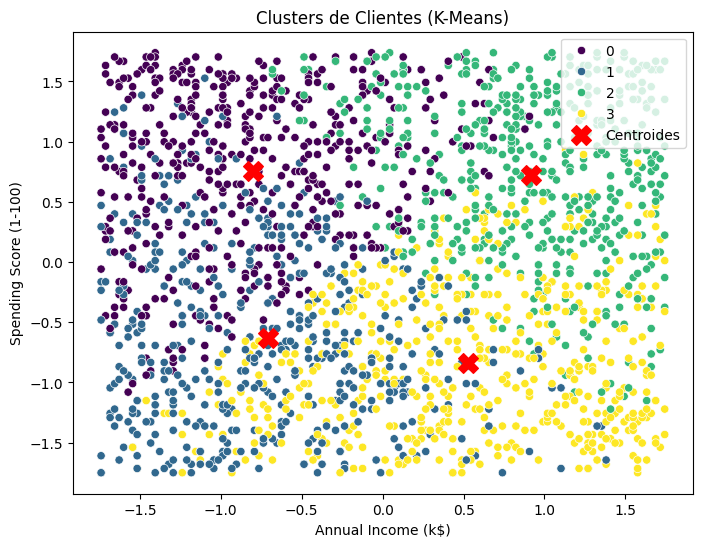

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="viridis")
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 1],  # eixo X = Renda
    centroids[:, 2],  # eixo Y = Pontuação de gasto
    s=200, c='red', marker='X', label='Centroides'
)
plt.title("Clusters de Clientes (K-Means)")
plt.legend()
plt.show()


Pelo gráfico:

Cluster roxo (0):
Clientes com baixa renda e baixo gasto.
Provavelmente pouco engajados ou de baixo poder aquisitivo.

Cluster azul (1):
Clientes com renda menor, mas gasto um pouco maior — podem ser impulsivos ou priorizar consumo.

Cluster verde (2):
Clientes de renda alta e gasto alto — público premium, interessante para campanhas específicas.

Cluster amarelo (3):
Clientes com renda alta, mas baixo gasto — podem precisar de estímulo (promoções, fidelização etc).

In [20]:
from sklearn.model_selection import KFold


# Usar as colunas que foram escalonadas para a validação cruzada
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

kf = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))

print("Silhouette médio (validação cruzada):", np.mean(silhouette_scores))



Silhouette médio (validação cruzada): 0.27592179143682616


apresenta clusters razoavelmente definidos, mas com alguma instabilidade entre subconjuntos de dados, conforme observado na validação cruzada (Silhouette médio ≈ 0.276)

In [19]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Reaplicando o modelo completo
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

sil = silhouette_score(X, clusters)
db = davies_bouldin_score(X, clusters)
ch = calinski_harabasz_score(X, clusters)

print(f"Silhouette Score: {sil:.4f}")
print(f"Davies-Bouldin Index: {db:.4f}")
print(f"Calinski-Harabasz Index: {ch:.4f}")


Silhouette Score: 0.2791
Davies-Bouldin Index: 1.0988
Calinski-Harabasz Index: 766.0691


Davies-Bouldin: Uma separação moderada, com certa sobreposição entre grupos.

Ainda assim, adequado para um cenário realista de segmentação de clientes, onde comportamentos intermediários são comuns.

Calinski-Harabasz: Boa compactação e separação relativa.

Comparado com outros Ks (ex: 2, 3, 5), esse valor pode confirmar que K=4 realmente é um ponto equilibrado entre separação e coesão.